<a href="https://colab.research.google.com/github/alokmangat/credit_card_fraud/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# @title Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
# to load the dataset
data=pd.read_csv('/content/card_transdata.csv')

In [86]:
# to read the first five rows of dataset
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [87]:
# to read last five rows of dataset
data.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [88]:
# number of rows and columns
print("number of rows and columns")
data.shape

number of rows and columns


(1000000, 8)

In [89]:
# some information related to the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [90]:
# statical data about the dataset
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000




---

# Data Cleaning

In [91]:
# check for null values
print("number of null values in each column")

data.isnull().sum()

number of null values in each column


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [94]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool

# 1--> Fraud
# 0-->No fraud

In [95]:
print("number of fraud and no fraud values")
data["fraud"].value_counts()

number of fraud and no fraud values


0.0    912597
1.0     87403
Name: fraud, dtype: int64

# Data visualization


<Axes: xlabel='repeat_retailer', ylabel='count'>

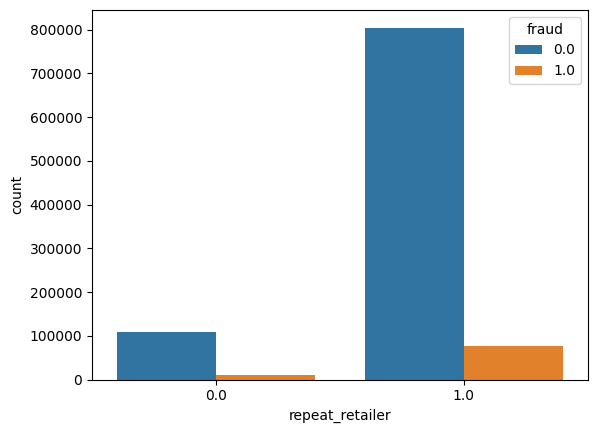

In [96]:
sns.countplot(x="repeat_retailer",hue="fraud",data=data)

<Axes: xlabel='used_pin_number', ylabel='count'>

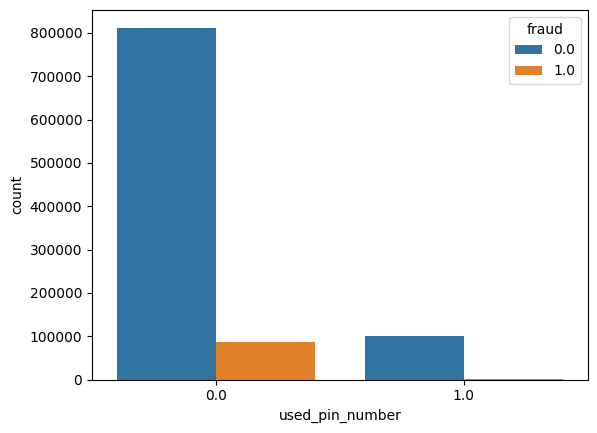

In [97]:
sns.countplot(x="used_pin_number",hue="fraud",data=data)

<Axes: xlabel='online_order', ylabel='count'>

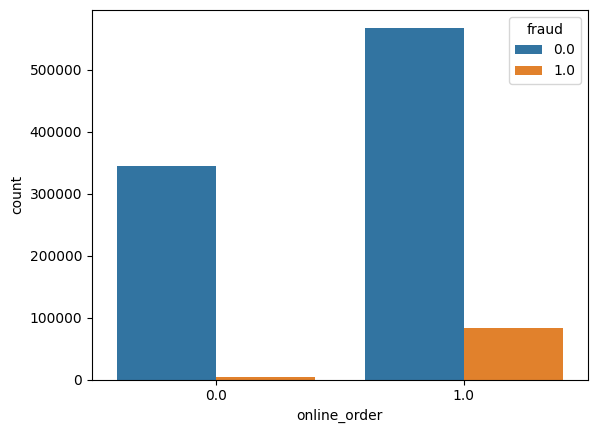

In [98]:
sns.countplot(x="online_order",hue="fraud",data=data)

In [99]:
data_corr=data.corr()

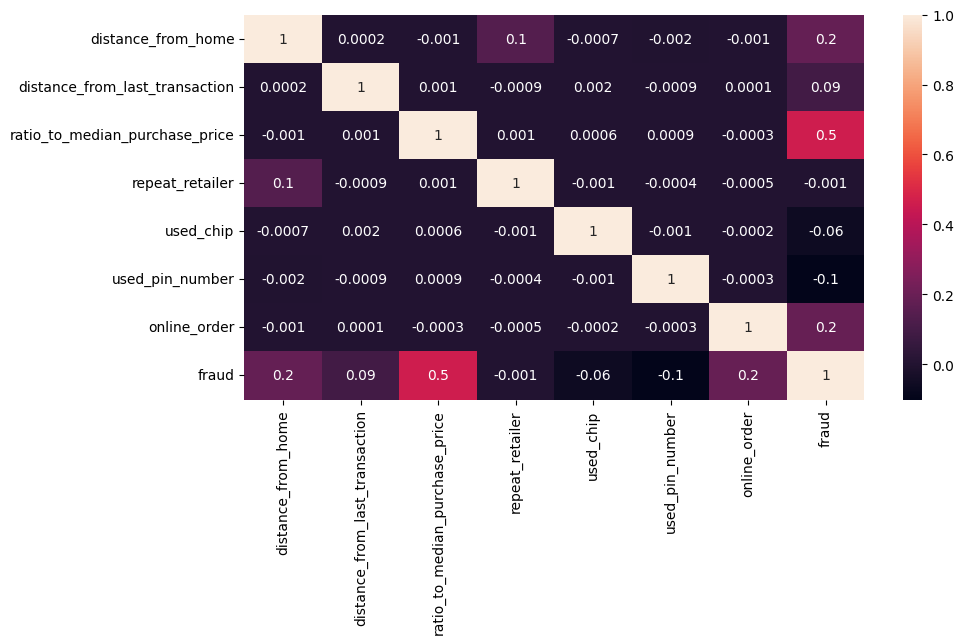

In [100]:
figure=plt.figure(figsize=(10,5))
sns.heatmap(data_corr,annot=True,fmt='.1g')
plt.show()

# Train and Test Data

In [101]:
from sklearn.model_selection import train_test_split

In [104]:
x=data.drop(['fraud'],axis=1)
y=data['fraud']
print(x)
print(y)

        distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2                             0.427715       

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [106]:
print("shape of data :",data.shape)
print("shape of train data :",x_train.shape)
print("shape of test data :",x_test.shape)

shape of data : (1000000, 8)
shape of train data : (800000, 7)
shape of test data : (200000, 7)


# Model

**Decision tree Model**

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [108]:
classifier=DecisionTreeClassifier(random_state=2)

In [109]:
# training the svm model
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=2)

**Model evaluation**

In [110]:
#accuracy on training data
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [111]:
print("Accuracy of the training data :",training_data_accuracy)

Accuracy of the training data : 1.0


In [112]:
#accuracy on testing data
x_test_prediction=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [113]:
print("Accuracy of the testing data :",training_data_accuracy)

Accuracy of the testing data : 1.0


**Logestic Regression Model**

In [114]:
from sklearn.linear_model import LogisticRegression

In [ ]:
regression=LogisticRegression()
regression.fit(x_train,y_train)

**Model Evaluation**

In [118]:
#accuracy on training data
x_train_prediction=regression.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("Accuracy of the training data :",training_data_accuracy)

Accuracy of the training data : 0.9578025


In [119]:
#accuracy on testing data
x_test_prediction=regression.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("Accuracy of the testing data :",training_data_accuracy)

Accuracy of the testing data : 0.9578025


**Random Forest**

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

**Model Evaluation**

In [122]:
#accuracy on training data
x_train_prediction=rf.predict(x_train)
data_accuracy=accuracy_score(x_train_prediction,y_train)
print("Accuracy of the training data :",data_accuracy)

Accuracy of the training data : 1.0


In [123]:
#accuracy on testing data
x_test_prediction=rf.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("Accuracy of the testing data :",training_data_accuracy)

Accuracy of the testing data : 0.9578025
